In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format


## EDA (EXPLORARY DATA ANALYSIS)

### STEP 1 - Import and Inspect Data

In [9]:
df = pd.read_csv("../../datasets/online_retail.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [11]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [12]:
df.shape

(1067371, 8)

In [16]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### STEP 2 - Handling Missing Values

In [17]:
df = df[df["Customer ID"].notna()]
df["Customer ID"] = df["Customer ID"].astype(int)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


### STEP 3 - Explore Data Characteristics & Transformations

In [22]:
df = df[df["Price"] > 0]
df = df[df["Quantity"] > 0]

df["Total Price"] = df["Price"] * df["Quantity"]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011,12


### STEP 4 - Handling Outliers

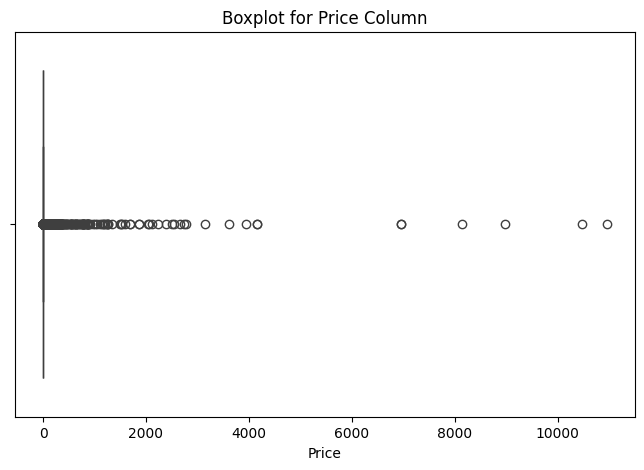

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot for Price Column')
plt.show()

In [24]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_mask = (df["Price"] >= lower) & (df["Price"] <= upper)
df = df[iqr_mask]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12


### STEP 5 - Visualizing Data Relationships

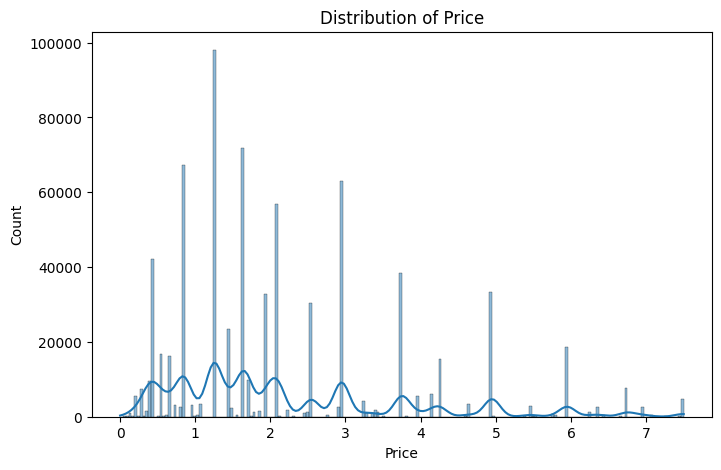

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

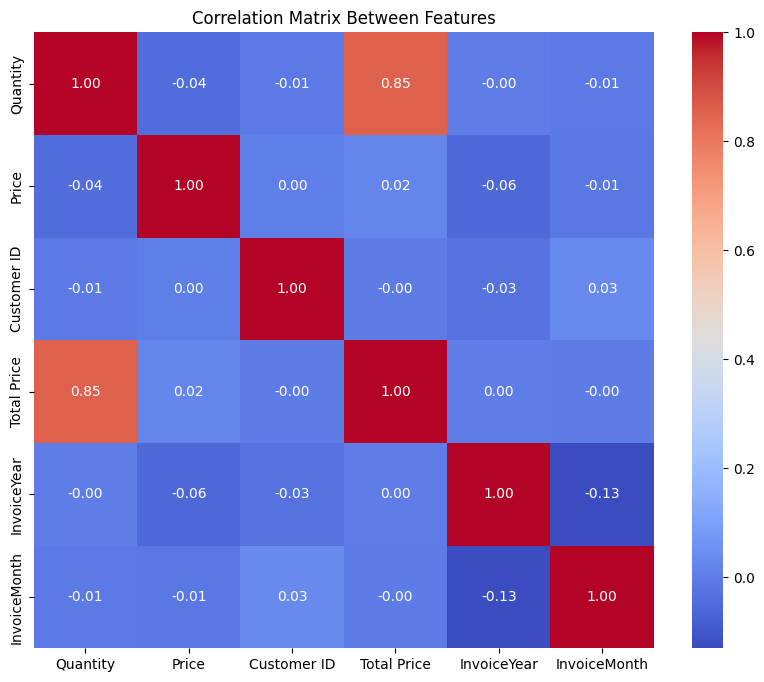

In [33]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, # Show the correlation values on the heatmap
    cmap='coolwarm',
    fmt=".2f" # Format annotation to two decimal places
)
plt.title('Correlation Matrix Between Features')
plt.show()

## ANALYSIS

### Customer Segmentation

In [37]:
customer_invoice = df.groupby(["Customer ID"]).agg({"Invoice": "nunique", "Total Price": "sum"}).reset_index()
customer_invoice["Segment"] = customer_invoice["Invoice"].apply(lambda x: "Single" if x == 1 else "Repeat")
segment_analysis = customer_invoice.groupby("Segment").agg({"Invoice": "count","Total Price": "sum" })
segment_analysis["Avg Revenue"] = (
    segment_analysis["Total Price"] / segment_analysis["Invoice"]
)
customer_segment = segment_analysis.rename(columns={"Invoice": "Customer Count", "Total Price": "Total Revenue"})
customer_segment

,Customer Count,Total Revenue,Avg Revenue
Segment,,,
Repeat,4209,14758453.43,3506.40
Single,1610,490065.48,304.39


### Revenue Concentration

In [38]:
customers_revenue = df.groupby(["Customer ID"]).agg({"Invoice": "nunique", "Total Price": "sum"}).sort_values(["Total Price"], ascending=False).reset_index(drop=True)
cutoff = int(len(customers_revenue) * 0.10)
top_mask = customers_revenue.index < cutoff
customers_revenue["Segment"] = np.where(
    top_mask,
    "Top 10%",
    "Bottom 90%"
)
total_revenue = customers_revenue["Total Price"].sum()
revenue_concentration = customers_revenue.groupby("Segment").agg({"Invoice": "count", "Total Price": "sum"})
revenue_concentration["Revenue Share"] = (revenue_concentration["Total Price"] / total_revenue) * 100
revenue_concentration = revenue_concentration.rename(columns={"Invoice": "Customer Count", "Total Price": "Revenue"})
revenue_concentration = revenue_concentration.sort_values(["Revenue Share"], ascending=False)
revenue_concentration

,Customer Count,Revenue,Revenue Share
Segment,,,
Top 10%,581,9821516.88,64.41
Bottom 90%,5238,5427002.03,35.59


### Purchase Frequency (Time-Based Behavior)

In [39]:
customers_invoices =  df.groupby("Customer ID").agg({"Invoice": "nunique", "InvoiceDate": lambda x: (pd.to_datetime(x).max() - pd.to_datetime(x).min()).days})
customers_invoices["Avg Purchase Gap"] = customers_invoices["InvoiceDate"] / (customers_invoices["Invoice"] - 1)
customers_invoices = customers_invoices[customers_invoices.Invoice > 1]

low = customers_invoices["Avg Purchase Gap"].quantile(0.33)
high = customers_invoices["Avg Purchase Gap"].quantile(0.66)

def define_segment(x):
    if x <= low:
        return "Low Frequency"
    elif x >= high:
        return "High Frequency"
    else:
        return "Medium Frequency"
customers_invoices["Segment"] = customers_invoices["Avg Purchase Gap"].apply(define_segment)
customers_invoices = customers_invoices.reset_index()
purchase_frequency = customers_invoices.groupby("Segment").agg({"InvoiceDate": "mean", "Avg Purchase Gap": "mean"})
purchase_frequency = purchase_frequency.rename(columns={"InvoiceDate": "Avg of Gap", "Avg Purchase Gap": "Avg of Purchase Frequency"})
purchase_frequency

,Avg of Gap,Avg of Purchase Frequency
Segment,,
High Frequency,413.23,207.15
Low Frequency,308.70,27.75
Medium Frequency,410.57,73.86


### Revenue per Customer

In [40]:
customer_revenue = df.groupby("Customer ID").agg({"Invoice": "nunique", "Total Price": "sum"})
customer_revenue["Avg Revenue"] = customer_revenue["Total Price"] / customer_revenue["Invoice"]

low_inv = customer_revenue["Invoice"].quantile(0.33)
high_inv = customer_revenue["Invoice"].quantile(0.66)

def define_segment_frequency(x):
    if x <= low_inv:
        return "Low Frequency"
    elif x >= high_inv:
        return "High Frequency"
    else:
        return "Medium Frequency"
        
customer_revenue["Frequency Segment"] = customer_revenue["Invoice"].apply(define_segment_frequency)

low_rev = customer_revenue["Avg Revenue"].quantile(0.33)
high_rev = customer_revenue["Avg Revenue"].quantile(0.66)

def define_segment_revenue(x):
    if x <= low_rev:
        return "Low Revenue"
    elif x >= high_rev:
        return "High Revenue"
    else:
        return "Medium Revenue"
        
customer_revenue["Revenue Segment"] = customer_revenue["Avg Revenue"].apply(define_segment_revenue)
customer_revenue = customer_revenue.reset_index()

customer_type_revenue = customer_revenue.groupby(["Frequency Segment", "Revenue Segment"]).agg({"Invoice": "sum", "Total Price": "sum"}).reset_index()
customer_type_revenue

,Frequency Segment,Revenue Segment,Invoice,Total Price
0,High Frequency,High Revenue,14205,9869153.71
1,High Frequency,Low Revenue,5487,749041.55
2,High Frequency,Medium Revenue,8950,2220289.47
3,Low Frequency,High Revenue,1014,823160.43
4,Low Frequency,Low Revenue,1424,161308.30
5,Low Frequency,Medium Revenue,1084,262632.54
6,Medium Frequency,High Revenue,1193,666215.77
7,Medium Frequency,Low Revenue,1322,162083.24
8,Medium Frequency,Medium Revenue,1378,334633.89


### Customer Recency (Time Since Last Purchase)

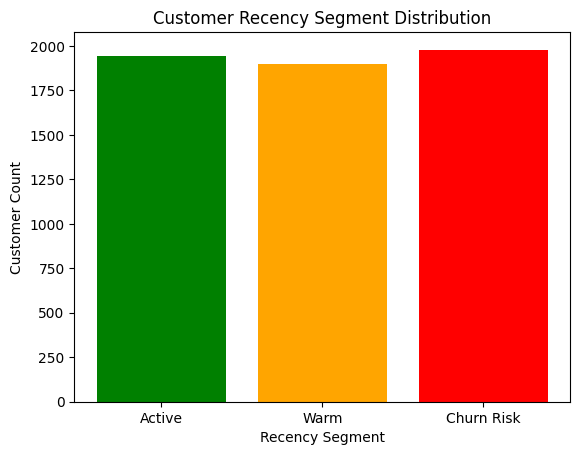

In [46]:
recency = df["InvoiceDate"].max()
customer_latest_purchase = df.groupby("Customer ID", as_index=False).agg(last_purchase=("InvoiceDate", "max"))
customer_latest_purchase["Recency"] = (recency - customer_latest_purchase["last_purchase"]).dt.days
low_recency = customer_latest_purchase["Recency"].quantile(0.33)
high_recency = customer_latest_purchase["Recency"].quantile(0.66)
def define_segment(x):
    if x <= low_recency:
        return "Active"
    elif x>= high_recency:
        return "Churn Risk"
    else:
        return "Warm"

customer_latest_purchase["Recency Segment"] = customer_latest_purchase["Recency"].apply(define_segment)
customer_recency = customer_latest_purchase.groupby("Recency Segment").agg(**{
    "Customer Count": ("Customer ID", "count"),
    "Avg Recency Days": ("Recency", "mean")
}
)

fig, ax = plt.subplots()
order = ["Active", "Warm", "Churn Risk"]

recency_plot = (
    customer_recency
    .reset_index()
    .set_index("Recency Segment")
    .reindex(order)
)

ax.bar(
    recency_plot.index,
    recency_plot["Customer Count"],
    color=["green", "orange", "red"]
)

ax.set_title("Customer Recency Segment Distribution")
ax.set_xlabel("Recency Segment")
ax.set_ylabel("Customer Count")

plt.show()

### Visual Prep 

In [44]:
freq = customers_invoices[["Customer ID", "Avg Purchase Gap", "Segment"]].rename(columns={"Segment":"Frequency Segment"})
revenue = customer_revenue[["Customer ID", "Total Price", "Avg Revenue", "Revenue Segment"]].rename(columns={"Total Price": "Revenue"})
recency = customer_latest_purchase[["Customer ID","Recency", "Recency Segment"]]
master_table = pd.merge(freq, revenue, on="Customer ID")
master_table = pd.merge(master_table, recency, on="Customer ID")
master_table.reset_index(drop=True, inplace=True)


# Step-by-step merge
master_table = pd.merge(freq, revenue, on="Customer ID", how="inner")
master_table = pd.merge(master_table, recency, on="Customer ID", how="inner")
master_table

,Customer ID,Avg Purchase Gap,Frequency Segment,Revenue,Avg Revenue,Revenue Segment,Recency,Recency Segment
0,12346,36.36,Low Frequency,77556.46,6463.04,High Revenue,325,Churn Risk
1,12347,57.43,Medium Frequency,5266.22,658.28,High Revenue,1,Active
2,12348,90.50,Medium Frequency,1659.40,331.88,High Revenue,74,Warm
3,12349,285.00,High Frequency,2765.84,921.95,High Revenue,18,Active
4,12352,44.50,Low Frequency,1461.99,162.44,Low Revenue,35,Active
...,...,...,...,...,...,...,...,...
4204,18281,397.00,High Frequency,167.24,83.62,Low Revenue,180,Warm
4205,18282,118.00,High Frequency,127.05,63.53,Low Revenue,7,Active
4206,18283,31.14,Low Frequency,2583.00,117.41,Low Revenue,3,Active
4207,18286,247.00,High Frequency,1089.73,544.87,High Revenue,476,Churn Risk


### Frequency × Revenue Heatmap

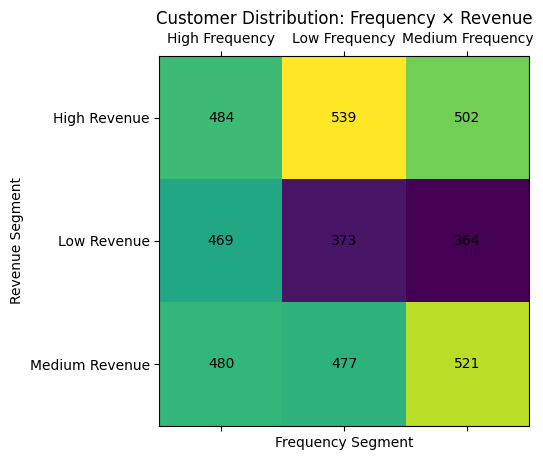

In [47]:
heatmap_data = (
    master_table
    .groupby(["Revenue Segment", "Frequency Segment"])
    .size()
    .unstack(fill_value=0)
)
fig, ax = plt.subplots()

cax = ax.matshow(heatmap_data)

ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns)

ax.set_yticks(range(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

ax.set_xlabel("Frequency Segment")
ax.set_ylabel("Revenue Segment")
ax.set_title("Customer Distribution: Frequency × Revenue")

for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        ax.text(
            j,
            i,
            heatmap_data.iloc[i, j],
            ha="center",
            va="center"
        )

plt.show()

### Revenue at Risk

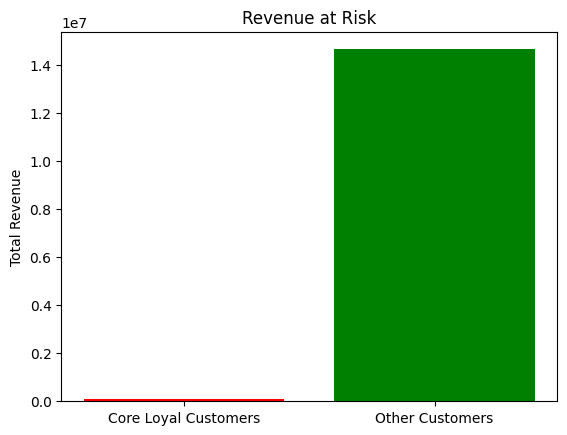

In [50]:
high_revenue = master_table["Revenue Segment"] == "High Revenue"
high_frequency = master_table["Frequency Segment"] == "High Frequency"
recency_segment = master_table["Recency Segment"] == "Churn Risk"
losing_customers = master_table[(
    high_revenue & high_frequency & recency_segment
)]

at_risk_revenue = losing_customers["Revenue"].sum()
total_revenue = master_table["Revenue"].sum()
other_revenue = total_revenue - at_risk_revenue

labels = ["Core Loyal Customers", "Other Customers"]
values = [at_risk_revenue, other_revenue]

fig, ax = plt.subplots()

ax.bar(labels, values, color=["red", "green"])

ax.set_title("Revenue at Risk")
ax.set_ylabel("Total Revenue")

plt.show()